In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
%pylab inline
%time from data import *

Populating the interactive namespace from numpy and matplotlib
CPU times: user 42.7 s, sys: 7.75 s, total: 50.4 s
Wall time: 50.5 s


In [438]:
item_pairs_train.head()

,itemID_1,itemID_2,isDuplicate,generationMethod
0,1,4112648,1,1
1,3,1991275,1,1
2,4,1223296,0,1
3,7,1058851,1,1
4,8,2161930,1,1


In [439]:
item_pairs_train.iloc[222]

itemID_1                260
itemID_2            2346459
isDuplicate               0
generationMethod          1
Name: 222, dtype: int64

In [440]:
left_img_ids = get_item(260)['images_array']
right_img_ids = get_item(2346459)['images_array']

In [441]:
def show_images(img_locs):
    for loc in img_locs:
        image = plt.imread(loc)
        plt.imshow(image)
        plt.axis('off')
        plt.show()

In [442]:
left_img_locs = batch_image_location(left_img_ids)
right_img_locs = batch_image_location(right_img_ids)

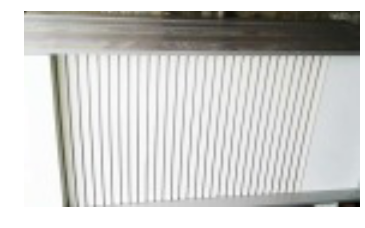

In [443]:
show_images(left_img_locs)

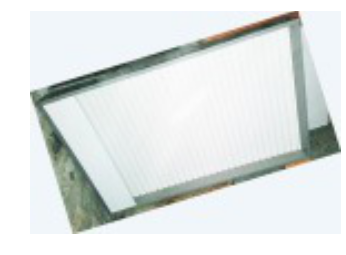

In [444]:
show_images(right_img_locs)

In [445]:
compare_images(left_img_locs, right_img_locs)

(-0.006363970722193299, -0.006363970722193299, -0.006363970722193299)

### Conclusion: This bad case needs more sophisticated comparision

In [516]:
image_pairs = pd.read_csv('data/data_files/image_itemPairs_train.csv')

In [519]:
image_pairs.head()

,Unnamed: 0,index,itemID_1,itemID_2,images_array_1,images_array_2
0,0,0,1,4112648,"1064094, 5252822, 6645873, 6960145, 9230265","1227519, 1374615, 7072137, 8671835"
1,1,1,3,1991275,"11919573, 14412228, 3204180, 6646877","11068709, 13325040, 13783238, 206652, 9458537"
2,2,2,4,1223296,"14384831, 6102021",5709245
3,3,3,7,1058851,NaN,7900519
4,4,4,8,2161930,"13718854, 4787310","10053682, 986143"


In [521]:
image_pairs.shape

(2991396, 6)

In [522]:
def calc_img_intersection(left, right):
    if left is np.nan or right is np.nan:
        return False
    else:
        l_set = pd.Index(left.split(','))
        r_set = pd.Index(right.split(','))
        intersection = l_set.intersection(r_set)
        if len(intersection) > 0:
            return True;
        else:
            return False;

In [523]:
%time intersection = image_pairs.apply(lambda row: calc_img_intersection(row['images_array_1'], row['images_array_2']), axis=1)

CPU times: user 19min 30s, sys: 2.22 s, total: 19min 32s
Wall time: 19min 32s


In [524]:
intersection.sum()

0

### Conclusion: There is no intersection between image IDs of item pairs (calcuting intersection needs 20 mins)